In [50]:
# Imports, load & clean, for self-contained notebook #2

import pandas as pd
import numpy as np

# Starting with already cleaned data from the previous Jupyter file. Make sure you've run 01 file before starting here to have the adult_clean.csv

df_clean = pd.read_csv("../data/adult_clean.csv")
df_clean.head()


df_clean.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
# Overall structure & uniqueness summary

print("Shape (rows, columns):", df_clean.shape)

print("\n=== dtypes ===")
print(df_clean.dtypes)

print("\n=== Basic info (non-null counts) ===")
df_clean.info()

print("\n=== Number of duplicate rows (uniqueness dimension) ===")
duplicate_count = df_clean.duplicated().sum()
print("Duplicate rows:", duplicate_count)


Shape (rows, columns): (32537, 15)

=== dtypes ===
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

=== Basic info (non-null counts) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship

In [52]:
# Completeness summary (counts + % missing)

# Completeness: check missingness per column
missing_counts = df_clean.isna().sum()
total_rows = len(df_clean)

completeness_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": (missing_counts / total_rows * 100).round(2)
}).sort_values("missing_percent", ascending=False)

completeness_summary


,missing_count,missing_percent
occupation,1843,5.66
workclass,1836,5.64
native_country,582,1.79
fnlwgt,0,0.00
education,0,0.00
education_num,0,0.00
age,0,0.00
marital_status,0,0.00
relationship,0,0.00
sex,0,0.00


In [53]:
# Save completeness summary to results folder

completeness_summary.to_csv("../results/completeness_summary.csv")


In [54]:
# Cardinality per column (nunique)
nunique_df = pd.DataFrame({
    "unique_values": df_clean.nunique()
}).sort_values("unique_values", ascending=False)

nunique_df




,unique_values
fnlwgt,21648
capital_gain,119
hours_per_week,94
capital_loss,92
age,73
native_country,41
education,16
education_num,16
occupation,14
workclass,8


In [55]:
# Save nunuique summary to results folder
nunique_df.to_csv("../results/nunique_summary.csv")


In [56]:
# Simple validity / range checks for numeric columns

numeric_cols = ["age", "fnlwgt", "education_num",
                "capital_gain", "capital_loss", "hours_per_week"]

df_clean[numeric_cols].describe()

# Age: should be > 16 and <= 90 (because Adult dataset is derived from the 1994 U.S. Census Public Use Microdata Sample (PUMS), which top-coded ages 
# above 90. Valid range should be 17-90
# “The Adult dataset is derived from U.S. Census PUMS data, which top-codes ages above 90.
# Therefore, an age value of 90 represents ‘90 or older’ and should be treated as a censored high-end category rather than an exact age.”
invalid_age = df_clean[(df_clean["age"] <= 0) | (df_clean["age"] > 90)]

# Hours per week: > 0 and <= 100 (again, a sensible bound)
invalid_hours = df_clean[(df_clean["hours_per_week"] <= 0) | (df_clean["hours_per_week"] > 100)]

# Capital gain/loss: should be >= 0 (already true if you check describe; but we verify)
invalid_capital = df_clean[(df_clean["capital_gain"] < 0) | (df_clean["capital_loss"] < 0)]

print("Invalid ages:", len(invalid_age))
print("Invalid hours_per_week:", len(invalid_hours))
print("Invalid capital rows:", len(invalid_capital))



Invalid ages: 0
Invalid hours_per_week: 0
Invalid capital rows: 0


In [57]:
# Frequency tables for key categoricals (clean version)

categorical_cols = [
    "workclass", "occupation", "native_country",
    "race", "sex", "marital_status", "education", "income"
]

for col in categorical_cols:
    print(f"\n=== Value counts for {col} ===")
    display(df_clean[col].value_counts(dropna=False))



=== Value counts for workclass ===


workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


=== Value counts for occupation ===


occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
NaN                  1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64


=== Value counts for native_country ===


native_country
United-States                 29153
Mexico                          639
NaN                             582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       


=== Value counts for race ===


race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


=== Value counts for sex ===


sex
Male      21775
Female    10762
Name: count, dtype: int64


=== Value counts for marital_status ===


marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


=== Value counts for education ===


education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64


=== Value counts for income ===


income
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [58]:
# Save a few results to the results folder
df_clean["workclass"].value_counts(dropna=False).to_csv("../results/workclass_counts.csv")
df_clean["occupation"].value_counts(dropna=False).to_csv("../results/occupation_counts.csv")


In [59]:
# Bias/fairness cross-tabs (data mining context)

# Income vs sex
print("=== Income by sex (row-normalized) ===")
ct_sex_income = pd.crosstab(df_clean["sex"], df_clean["income"], normalize="index").round(3)
display(ct_sex_income)

# Income vs race
print("\n=== Income by race (row-normalized) ===")
ct_race_income = pd.crosstab(df_clean["race"], df_clean["income"], normalize="index").round(3)
display(ct_race_income)

# Income vs marital_status
print("\n=== Income by marital_status (row-normalized) ===")
ct_marital_income = pd.crosstab(df_clean["marital_status"], df_clean["income"], normalize="index").round(3)
display(ct_marital_income)


=== Income by sex (row-normalized) ===


income,<=50K,>50K
sex,,
Female,0.890,0.110
Male,0.694,0.306



=== Income by race (row-normalized) ===


income,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.884,0.116
Asian-Pac-Islander,0.734,0.266
Black,0.876,0.124
Other,0.908,0.092
White,0.744,0.256



=== Income by marital_status (row-normalized) ===


income,<=50K,>50K
marital_status,,
Divorced,0.896,0.104
Married-AF-spouse,0.565,0.435
Married-civ-spouse,0.553,0.447
Married-spouse-absent,0.919,0.081
Never-married,0.954,0.046
Separated,0.936,0.064
Widowed,0.914,0.086


## Capital Gain / Loss Skew Check
The Adult dataset is known to contain extremely right-skewed distributions for capital gains and capital losses. 
Most individuals report zero in these fields, with a very small number having large positive values. 
This makes the variables highly imbalanced and potentially problematic for modeling unless transformed.


=== Capital Gain Summary ===
count    32537.000000
mean      1078.443741
std       7387.957424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

Zero values: 29825
Non-zero values: 2712


=== Capital Loss Summary ===
count    32537.000000
mean        87.368227
std        403.101833
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

Zero values: 31018
Non-zero values: 1519


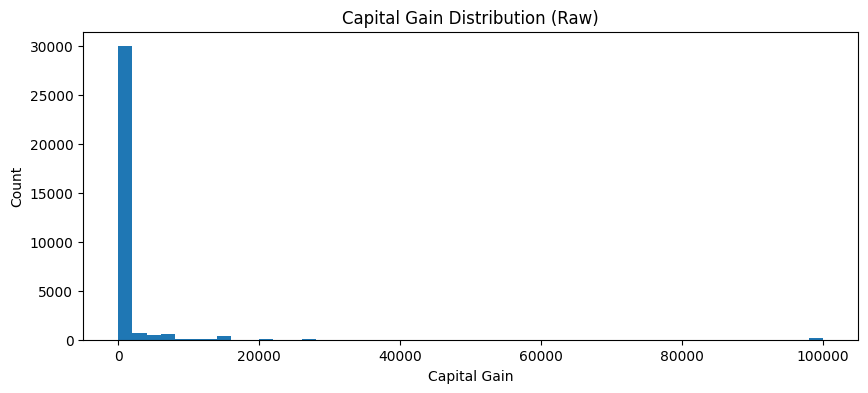

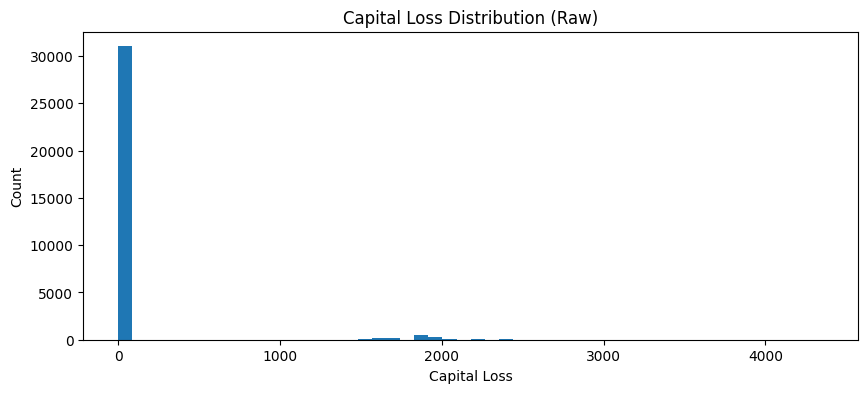

In [66]:
# Capital gain/loss skew check

print("=== Capital Gain Summary ===")
print(df_clean["capital_gain"].describe())
print("\nZero values:", (df_clean["capital_gain"] == 0).sum())
print("Non-zero values:", (df_clean["capital_gain"] != 0).sum())

print("\n\n=== Capital Loss Summary ===")
print(df_clean["capital_loss"].describe())
print("\nZero values:", (df_clean["capital_loss"] == 0).sum())
print("Non-zero values:", (df_clean["capital_loss"] != 0).sum())

# Simple histogram visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(df_clean["capital_gain"], bins=50)
plt.title("Capital Gain Distribution (Raw)")
plt.xlabel("Capital Gain")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,4))
plt.hist(df_clean["capital_loss"], bins=50)
plt.title("Capital Loss Distribution (Raw)")
plt.xlabel("Capital Loss")
plt.ylabel("Count")
plt.show()



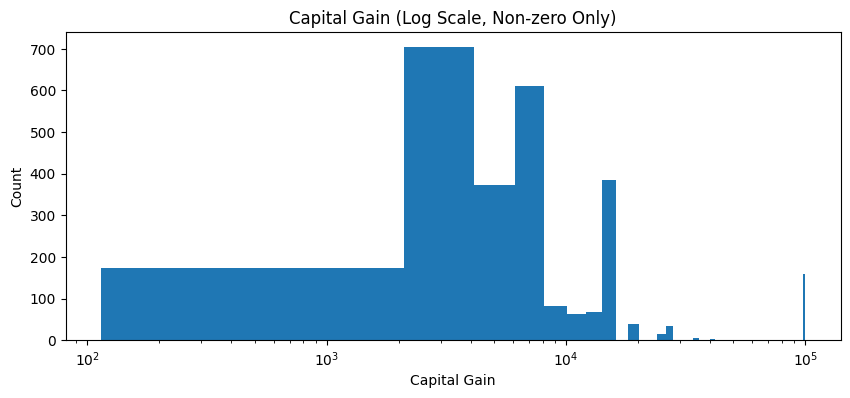

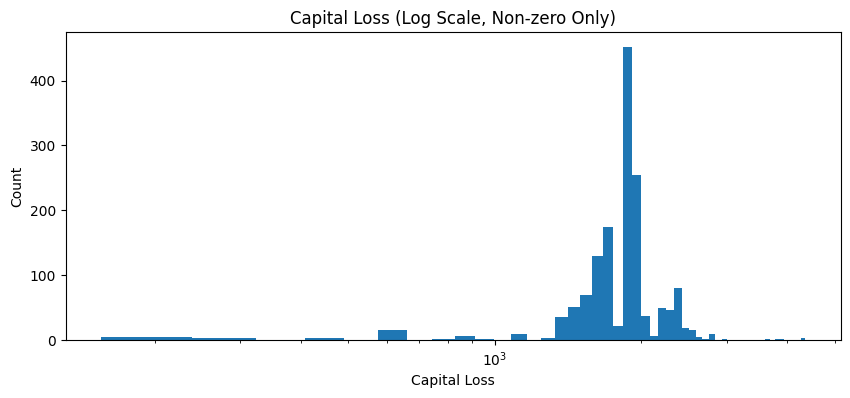

In [67]:
plt.figure(figsize=(10,4))
plt.hist(df_clean["capital_gain"][df_clean["capital_gain"] > 0], bins=50)
plt.xscale("log")
plt.title("Capital Gain (Log Scale, Non-zero Only)")
plt.xlabel("Capital Gain")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,4))
plt.hist(df_clean["capital_loss"][df_clean["capital_loss"] > 0], bins=50)
plt.xscale("log")
plt.title("Capital Loss (Log Scale, Non-zero Only)")
plt.xlabel("Capital Loss")
plt.ylabel("Count")
plt.show()

From the above results, we can visually see that the capital gains/loss data is EXTREMELY skewed, with a very small number of individuals reporting very large gains or loss of capital. This makes this data extremely unreliable! Furthermore, the 99999 'max' for capital gain or loss is a highly suspect figure; this is likely the maximize amount an individual was permitted to input onto the census record, and not the true maximum gain or loss. This suggests that in reality the data should have been even more skewed than it is.

In [61]:
# Save a few results to results folder
ct_sex_income.to_csv("../results/ct_sex_income.csv")
ct_race_income.to_csv("../results/ct_race_income.csv")
ct_marital_income.to_csv("../results/ct_marital_income.csv")


### Hours-per-Week Distribution (Skew)

The `hours_per_week` column displays a highly non-uniform distribution. A large majority of individuals report working exactly **40 hours per week**, producing a sharp mode that dominates the distribution. While this value is common in full-time employment, its overwhelming frequency suggests potential reporting conventions or response clustering rather than naturally occurring variation. This skew can limit the model’s ability to learn meaningful patterns from working hours, since most observations concentrate in a single value with relatively few mid-range or high-hour cases to provide contrast.


In [63]:
df_clean["hours_per_week"].describe()


count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [64]:
df_clean["hours_per_week"].describe()


count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

<Axes: >

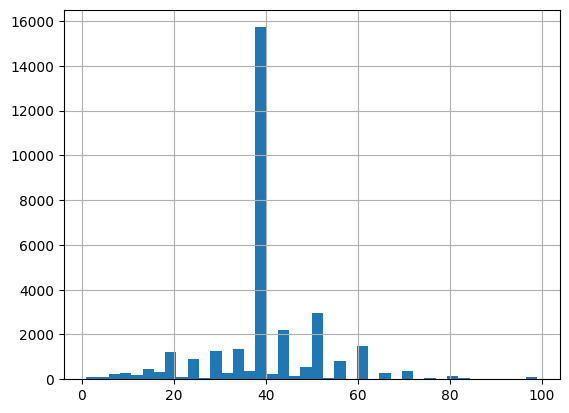

In [65]:
df_clean["hours_per_week"].hist(bins=40)


### Hours-per-Week Skew
The distribution of `hours_per_week` is super concentrated at the 40-hour mode, with a long right-side tail extending toward extreme high values of 60–90 hours per week. From a data quality perspective, how can we tell if these extreme values are legitimately from heavy-workload jobs or from overreporting, and the extreme number of '40' hours is also a little suspicious also makes hours-per-week a less-likely-useful indicator of income, since so many individuals share the exact same value while having differing incomes. To make this feature more useful for a regression model, the data could be transformed, or the outliers could be dealt with.


<h3>Notes for report</h3>

<ul style="margin-top:4px">
  <li><b>Completeness:</b>
    <ul style="margin-top:2px">
      <li>Highest missingness in workclass, occupation, and native_country.</li>
      <li>Missing % available in summary table.</li>
    </ul>
  </li>

  <li><b>Validity:</b>
    <ul style="margin-top:2px">
      <li>Numeric ranges look reasonable.</li>
      <li>Categorical values consistent.</li>
    </ul>
  </li>

  <li><b>Uniqueness:</b>
    <ul style="margin-top:2px">
      <li>Duplicate rows: X (see earlier result)</li>
    </ul>
  </li>

  <li><b>Bias / fairness:</b>
    <ul style="margin-top:2px">
      <li>Income disparities visible across sex, race, and marital status.</li>
    </ul>
  </li>
</ul>


In [62]:
# Save final cleaned data
# Final clean dataset export
# This contains '?' replaced with NaN and is suitable for later use

output_path = "../data/adult_clean.csv"
df_clean.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")
df_clean.head()


Cleaned dataset saved to: ../data/adult_clean.csv


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
